In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import numpy as np

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('astro_lsst_01_1000_sqlite.db')
outDir = 'astrometry_dcr'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
sql = 'night < %i' % (365.25*2) 
slicer = slicers.HealpixSlicer(nside=8)
metricList = []
metricList.append(metrics.ParallaxDcrDegenMetric())

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes


In [4]:
bundleList = []
for metric in metricList:
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

In [5]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint night < 730
Found 498511 visits
Running:  ['opsim_ParallaxDcrDegenMetric_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with night < 730 sqlconstraint now.
monopole: 0.000585864  dipole: lon: 82.3908, lat: 85.6135, amp: 0.00060624
Plotting complete.


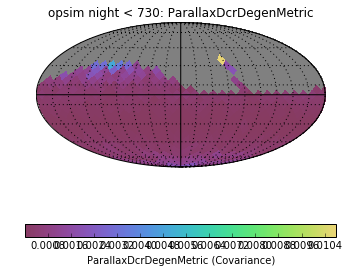

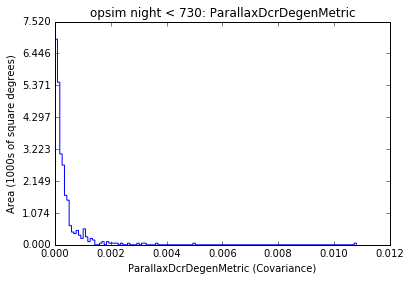

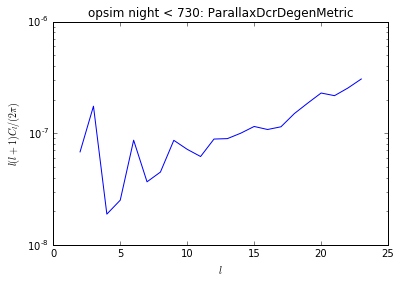

In [6]:
bgroup.plotAll(closefigs=False)

In [7]:
np.min(np.abs(bundleList[0].metricValues))

6.0014445337161116e-06